In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

In [3]:
mat = training_data.as_matrix()

D:\Vedant Mehra\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [4]:
image1 = mat[0, 1:]

In [5]:
image1 = image1.reshape(28, 28)
image1.shape

(28, 28)

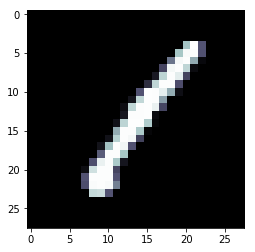

In [6]:
plt.imshow(image1, cmap = plt.cm.bone)

In [7]:
x_train = training_data
y_train = training_data['label']

In [8]:
x_test = testing_data

In [9]:
del x_train['label']

In [10]:
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while(current_sum/total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
print(k)

331


In [12]:
pca = PCA(n_components = k, whiten = True)

In [15]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
svm_clf = svm.SVC()
svm_clf.fit(x_train_pca, y_train)

In [ ]:
y_pred_svm = svm_clf.predict(x_test_pca)

In [ ]:
np.savetxt('Ans_svm_y_pred_svm.csv', y_pred_svm, delimiter = ",", fmt = "%.0f")

In [ ]:
a = pd.DataFrame()

In [ ]:
print(y_pred_svm.shape)
a1 = []
for i in range(1, y_pred_svm.shape[0] + 1):
    a1.append(i)

In [ ]:
a['ImageId'] = a1

In [ ]:
a['Label'] = y_pred_svm

In [ ]:
np.savetxt('Ans_svm.csv', a, delimiter = ",", fmt = "%.0f")

In [ ]:
y_pred_svm_train = svm_clf.predict(x_train_pca)

In [ ]:
print(classification_report((y_train, y_pred_svm_train)))